In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Kichan\AppData\Local\Temp\ipykernel_3544\3794275619.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
for col in df_train.columns:
    msg = 'column:{:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:PassengerId	 Percent of Nan value: 0.00%
column:  Survived	 Percent of Nan value: 0.00%
column:    Pclass	 Percent of Nan value: 0.00%
column:      Name	 Percent of Nan value: 0.00%
column:       Sex	 Percent of Nan value: 0.00%
column:       Age	 Percent of Nan value: 19.87%
column:     SibSp	 Percent of Nan value: 0.00%
column:     Parch	 Percent of Nan value: 0.00%
column:    Ticket	 Percent of Nan value: 0.00%
column:      Fare	 Percent of Nan value: 0.00%
column:     Cabin	 Percent of Nan value: 77.10%
column:  Embarked	 Percent of Nan value: 0.22%


<Axes: >

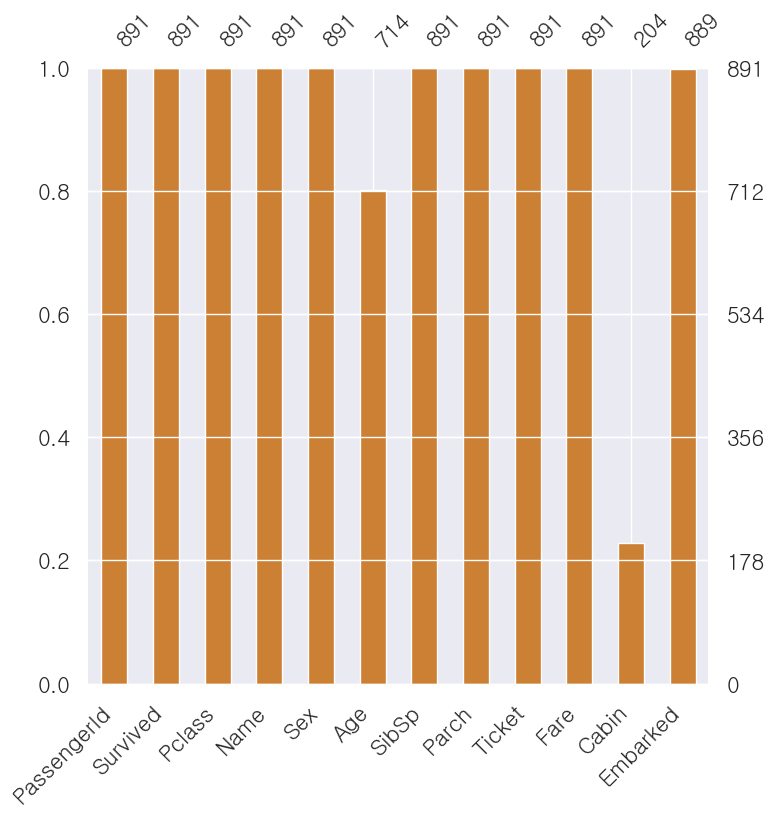

In [7]:
msno.bar(df = df_train.iloc[:,:], figsize = (8,8), color=(0.8, 0.5, 0.2))

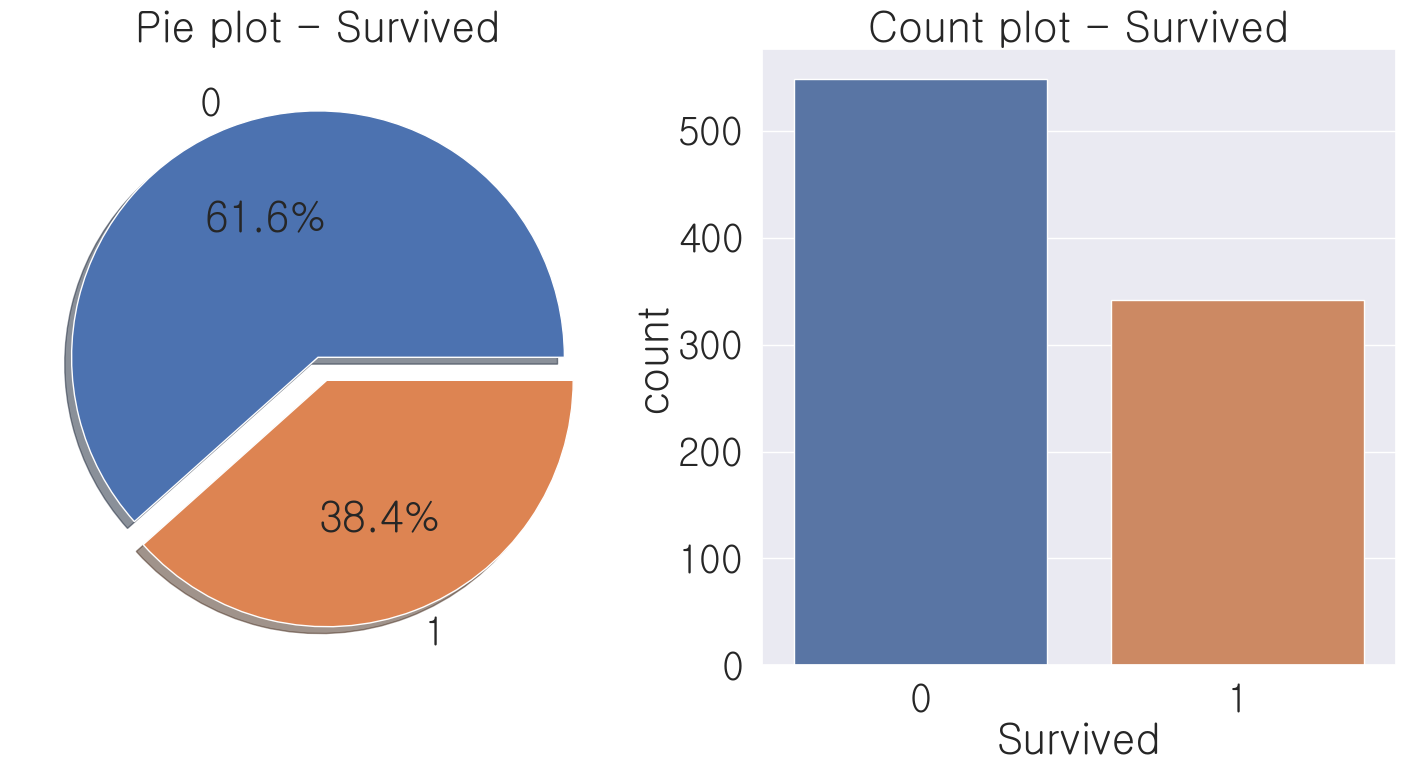

In [8]:
f , ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count().rename(columns={'Survived':'Total'})

,Total
Pclass,
1,216
2,184
3,491


In [10]:
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [11]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

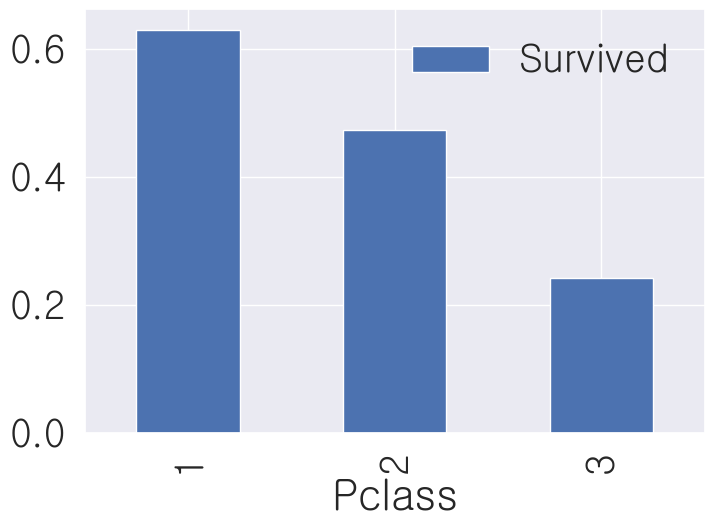

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by = 'Survived', ascending=False).plot.bar()

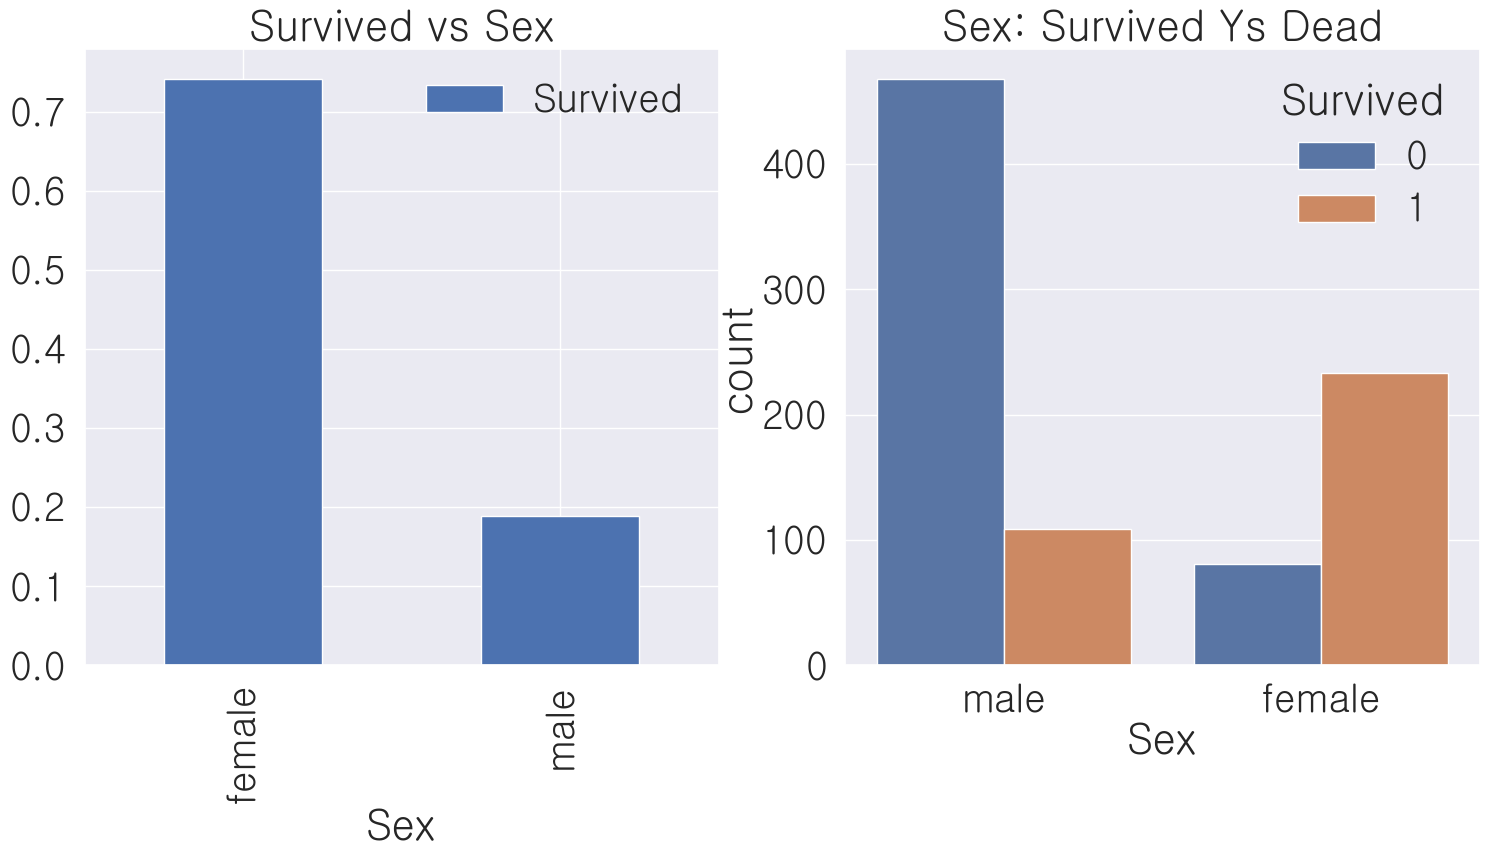

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived Ys Dead')
plt.show()



In [14]:
df_train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by = 'Survived', ascending=False).round(2)

,Survived
Sex,
female,0.74
male,0.19


<Axes: xlabel='Pclass', ylabel='Survived'>

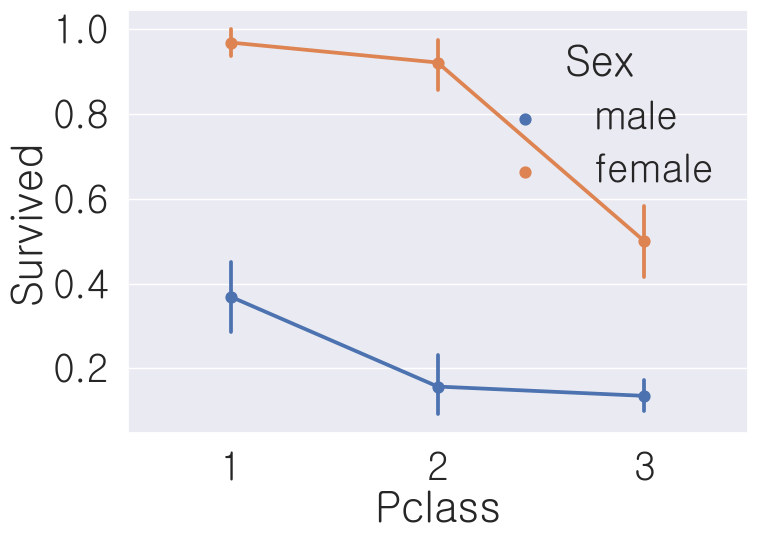

In [15]:
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train)

In [16]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


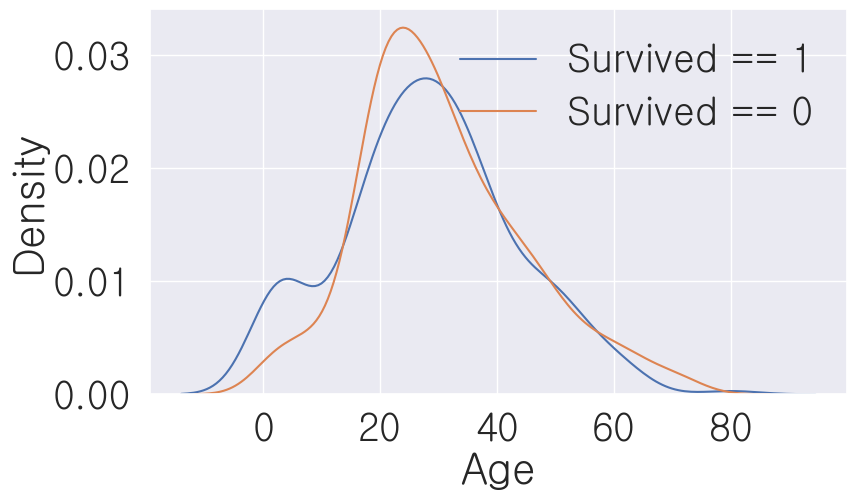

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])

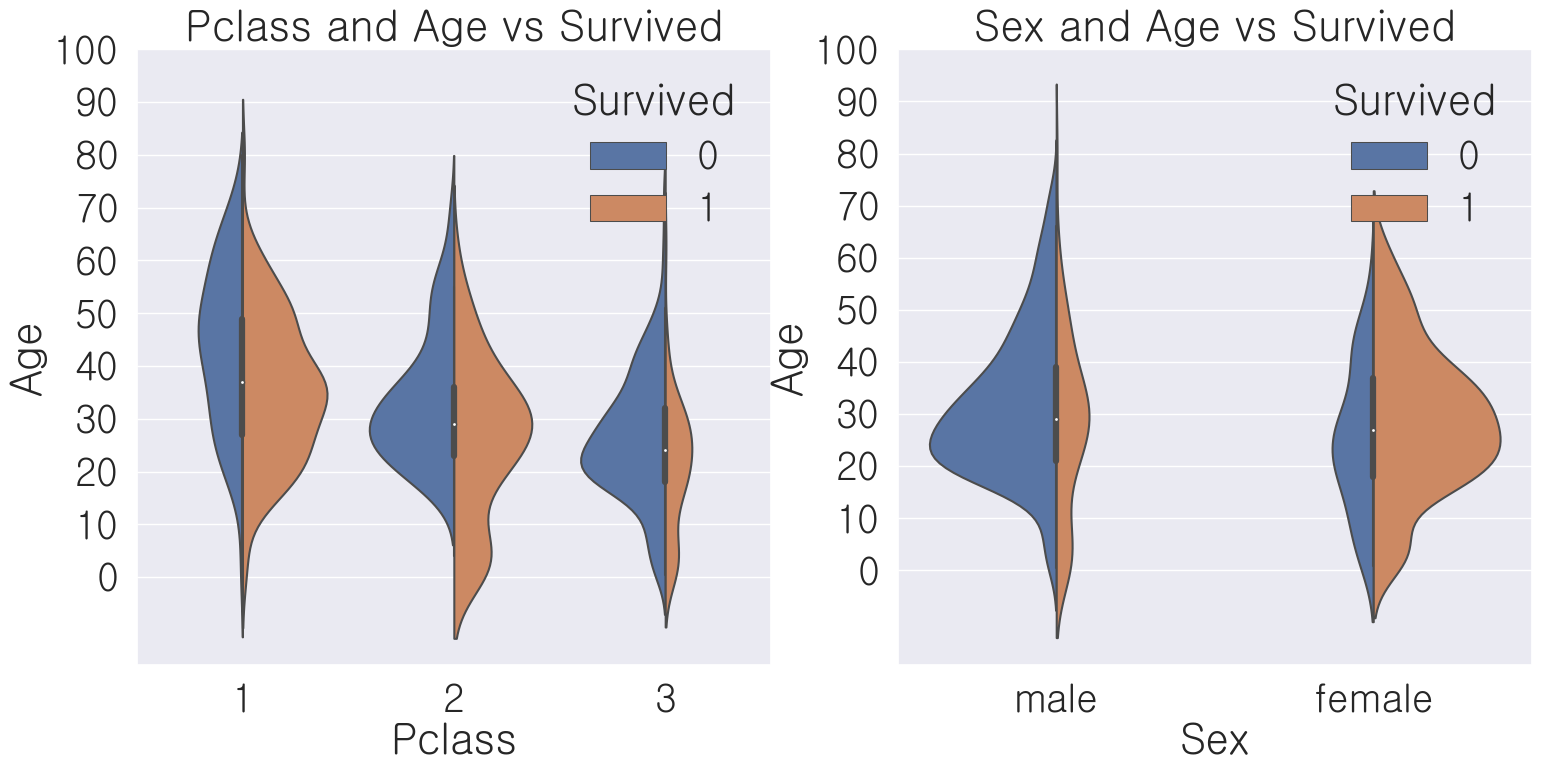

In [18]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(x = "Pclass", y = "Age", hue = "Survived", data = df_train, scale='count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x = "Sex", y = "Age", hue = "Survived", data = df_train, scale='count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [19]:
df_train['Ticket'].value_counts()[:50]

Ticket
347082           7
CA. 2343         7
1601             7
3101295          6
CA 2144          6
347088           6
S.O.C. 14879     5
382652           5
LINE             4
PC 17757         4
17421            4
349909           4
113760           4
4133             4
113781           4
W./C. 6608       4
2666             4
19950            4
347077           4
C.A. 31921       3
PC 17572         3
C.A. 34651       3
363291           3
F.C.C. 13529     3
345773           3
248727           3
24160            3
29106            3
SC/Paris 2123    3
35273            3
371110           3
230080           3
PC 17760         3
239853           3
PC 17582         3
347742           3
110152           3
13502            3
110413           3
PC 17755         3
PC 17558         2
237736           2
17474            2
PC 17758         2
PP 9549          2
S.O./P.P. 3      2
P/PP 3381        2
PC 17485         2
2668             2
2627             2
Name: count, dtype: int64

In [20]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df_ticket = df_train[['Ticket', 'Fare', 'Survived']].sort_values(by = 'Fare', ascending=False)

In [22]:
ticket_cnt = df_ticket[['Ticket', 'Fare', 'Survived']].groupby(['Ticket', 'Fare']).count().sort_values(by = 'Fare', ascending=False).reset_index().rename(columns={'Survived':'cnt'})

In [23]:
ticket_cnt

,Ticket,Fare,cnt
0,PC 17755,512.3292,3
1,19950,263.0000,4
2,PC 17608,262.3750,2
3,PC 17558,247.5208,2
4,PC 17757,227.5250,4
...,...,...,...
677,19972,0.0000,1
678,112052,0.0000,1
679,112058,0.0000,1
680,112050,0.0000,1


In [24]:
ticket_sum = df_ticket[['Ticket', 'Survived']].groupby(['Ticket']).sum().sort_values(by = 'Survived', ascending=False).reset_index()

In [25]:
ticket_sum

,Ticket,Survived
0,1601,5
1,2666,4
2,113760,4
3,110152,3
4,13502,3
...,...,...
676,349212,0
677,349210,0
678,349209,0
679,349208,0


In [26]:
ticket = pd.merge(ticket_cnt, ticket_sum, on = 'Ticket')

In [27]:
ticket['Avg'] = ticket['Survived'] / ticket['cnt']

In [28]:
ticket_tmp = ticket[['Ticket', 'Avg']]

In [29]:
ticket_tmp

,Ticket,Avg
0,PC 17755,1.00
1,19950,0.50
2,PC 17608,1.00
3,PC 17558,0.50
4,PC 17757,0.75
...,...,...
677,19972,0.00
678,112052,0.00
679,112058,0.00
680,112050,0.00


Text(0.5, 1.0, '티켓 가격에 따른 생존률')

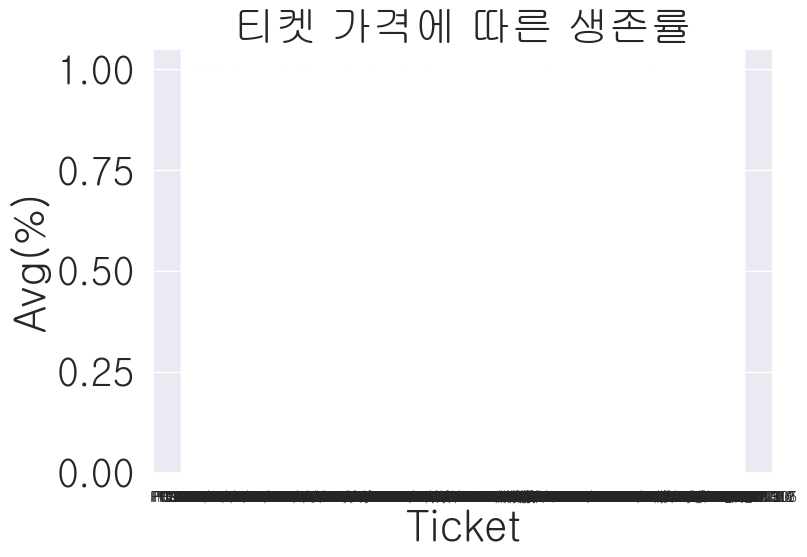

In [30]:
plt.figure()
plt.bar(ticket_tmp.Ticket,ticket_tmp.Avg,color =['#00035b','#006699','#75bbfd','#06c2ac','#96f97b'])
plt.xlabel('Ticket')
plt.ylabel('Avg(%)')
plt.xticks(fontsize=10)  # 폰트 크기 조정
plt.title('티켓 가격에 따른 생존률')


In [31]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

In [33]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [34]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [35]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [36]:
df_train[['Initial', 'Age']].groupby('Initial').mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [37]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] = 46

In [38]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [39]:
df_train['Embarked'].fillna('S', inplace=True)

In [40]:
def age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [41]:
df_train['Age_cat'] = df_train.apply(lambda x:age(x['Age']) , axis = 1)

In [42]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [43]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [44]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})

In [45]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,3,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,3,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2,4,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,NaN,2,1,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,2,2


In [46]:
df_test = pd.read_csv('test.csv')

In [47]:
df_test = pd.read_csv('test.csv')
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [48]:
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46
df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [49]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,1,1,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,2,2,3,4
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,1,1,2,6
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,2,1,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,33.0,0,0,A.5. 3236,2.085672,NaN,2,1,2,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,4.690430,C105,0,1,2,3
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,1.981001,NaN,2,1,2,3
416,1308,3,"Ware, Mr. Frederick",1,33.0,0,0,359309,2.085672,NaN,2,1,2,3


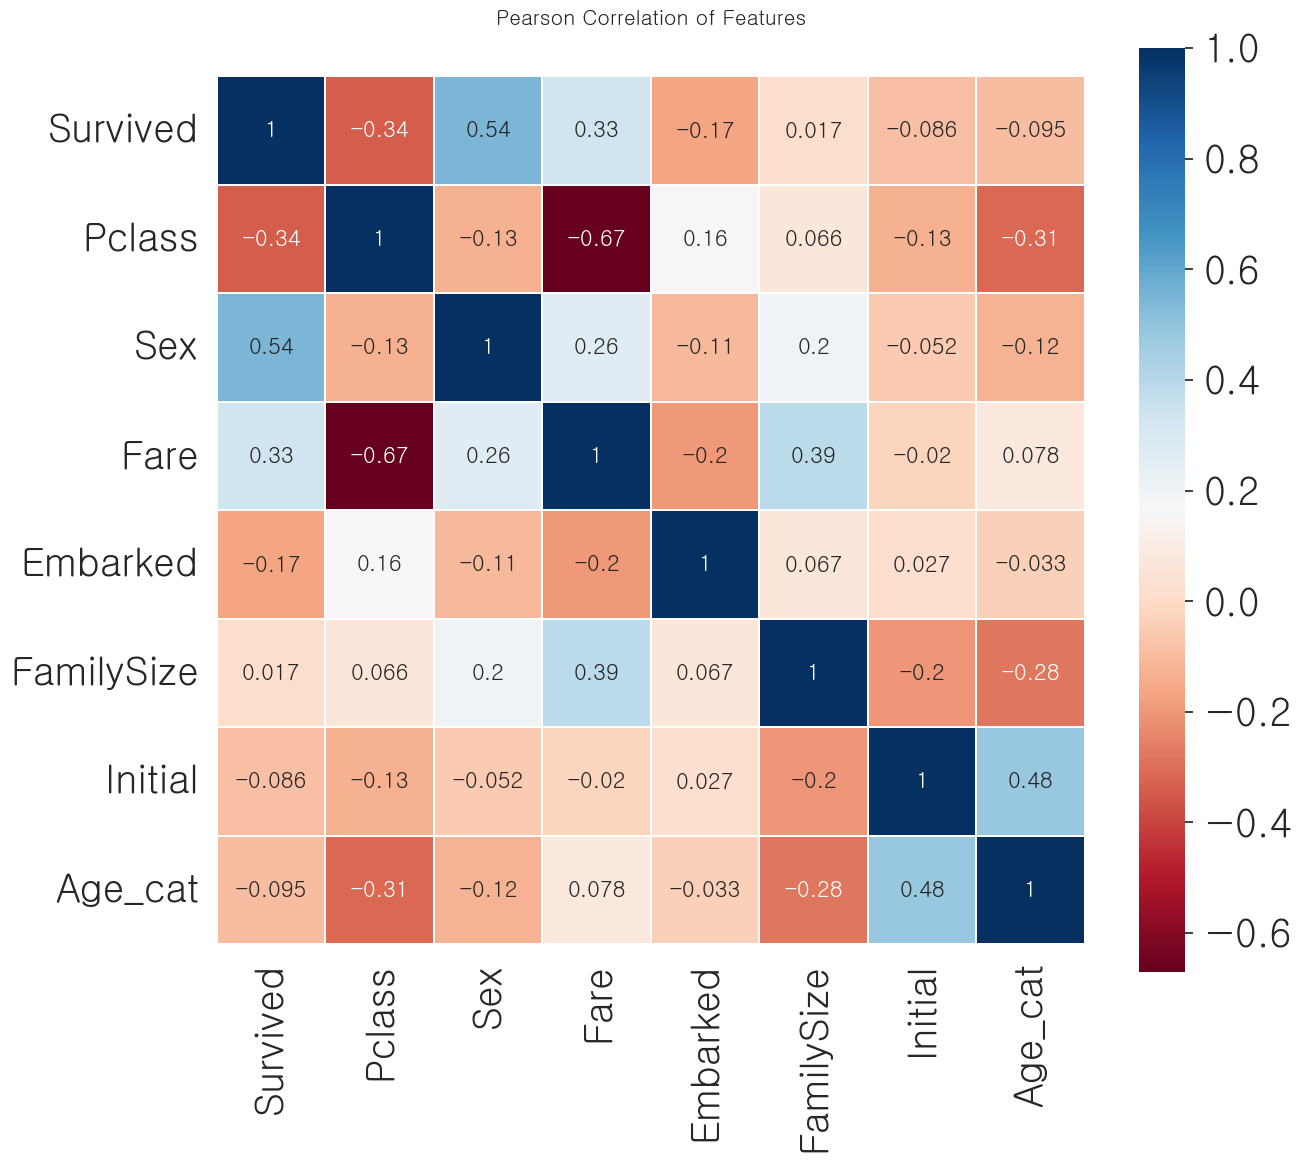

In [50]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data


In [51]:
df_train  = pd.get_dummies(df_train,columns=['Initial'],dtype = int)
df_test  = pd.get_dummies(df_test,columns=['Initial'],dtype = int)

In [52]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,1,1,3,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,2,2,4,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,1,1,6,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,2,1,2,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,2,3,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,33.0,0,0,A.5. 3236,2.085672,NaN,2,1,3,0,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,4.690430,C105,0,1,3,0,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,1.981001,NaN,2,1,3,0,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",1,33.0,0,0,359309,2.085672,NaN,2,1,3,0,0,1,0,0


In [53]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked',dtype = int)
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked',dtype = int)

In [54]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin','Age'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin','Age'], axis=1, inplace=True)

In [73]:
df_train = df_train[['Pclass','Sex','Fare','Age_cat','FamilySize','Initial_0','Initial_1','Initial_2','Initial_3','Initial_4','Embarked_0','Embarked_1','Embarked_2']]

,Pclass,Sex,Fare,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,4.266662,3,2,0,0,0,1,0,1,0,0
2,3,1,2.070022,2,1,0,1,0,0,0,0,0,1
3,1,1,3.972177,3,2,0,0,0,1,0,0,0,1
4,3,0,2.085672,3,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,2.564949,2,1,0,0,0,0,1,0,0,1
887,1,1,3.401197,1,1,0,1,0,0,0,0,0,1
888,3,1,3.154870,2,4,0,1,0,0,0,0,0,1
889,1,0,3.401197,2,1,0,0,1,0,0,1,0,0


In [59]:
df_test

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,2.085672,1,3,0,0,1,0,0,0,0,1
414,1,0,4.690430,1,3,0,0,1,0,0,1,0,0
415,3,1,1.981001,1,3,0,0,1,0,0,0,0,1
416,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
log = LogisticRegression()

In [75]:
x_train =  df_train[['Pclass','Sex','Fare','Age_cat','FamilySize','Initial_0','Initial_1','Initial_2','Initial_3','Initial_4','Embarked_0','Embarked_1','Embarked_2']]
y_train = df_train['Survived']
x_test = df_test[['Pclass','Sex','Fare','Age_cat','FamilySize','Initial_0','Initial_1','Initial_2','Initial_3','Initial_4','Embarked_0','Embarked_1','Embarked_2']]

In [76]:
x_train.shape, y_train.shape, x_test.shape

((891, 13), (891,), (418, 13))

In [77]:
log.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred = log.predict(x_test)

In [84]:
accuracy = accuracy_score(pd.read_csv('gender_submission.csv')['Survived'], y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5813397129186603
